#### 1.在ArcGIS中将行政村与人口数据进行合并为新文件

#### 2.分析对象列获取

In [1]:
import arcpy

In [2]:
#获取信息的年份
years = ['2000','2005','2010','2013']
#获取劳动/一产/二三产人口信息
labor_type = ['NL','YC','ES']
#将年份和劳动类型进行组合
field_org = []
for i in years:
    for m in labor_type:
        field_org.append(m+i)
field_org.append('SHAPE_Area')
print(field_org)

['NL2000', 'YC2000', 'ES2000', 'NL2005', 'YC2005', 'ES2005', 'NL2010', 'YC2010', 'ES2010', 'NL2013', 'YC2013', 'ES2013', 'SHAPE_Area']


#### 3.添加字段

#### arcpy新增列/arcpy添加字段
AddField_management(文件,列名,数据类型)

In [3]:
#创建劳动力密度的列
years = ['2000','2005','2010','2013']
labor_type = ['MDNL','MDYC','MDES']
field_add = []
for i in years:
    for m in labor_type:
        field_add.append(m+i)
print(field_add)

['MDNL2000', 'MDYC2000', 'MDES2000', 'MDNL2005', 'MDYC2005', 'MDES2005', 'MDNL2010', 'MDYC2010', 'MDES2010', 'MDNL2013', 'MDYC2013', 'MDES2013']


In [14]:
#对象文件路径
fc = r'D:\rui\code_analysis\file\subject\chapter4\process\process.gdb\XZQ_vill_277_data'
#添加新增列
for i in field_add:
    arcpy.AddField_management(fc,i,'DOUBLE')

#### 4.字段组合

In [4]:
fields = field_add +  field_org

#### 5.字段计算

#### 查看ArcGIS帮助文档，搜索
UpdateCursor (arcpy.da)
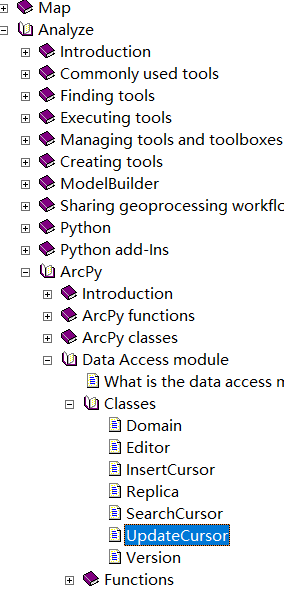

In [6]:
fc = r'D:\rui\code_analysis\file\subject\chapter4\process\process.gdb\XZQ_vill_277_data'
fields = field_add +  field_org
print(fields)

['MDNL2000', 'MDYC2000', 'MDES2000', 'MDNL2005', 'MDYC2005', 'MDES2005', 'MDNL2010', 'MDYC2010', 'MDES2010', 'MDNL2013', 'MDYC2013', 'MDES2013', 'NL2000', 'YC2000', 'ES2000', 'NL2005', 'YC2005', 'ES2005', 'NL2010', 'YC2010', 'ES2010', 'NL2013', 'YC2013', 'ES2013', 'SHAPE_Area']


In [17]:
# Create update cursor for feature class 
with arcpy.da.UpdateCursor(fc, fields) as cursor:
    # 'MDNL2000' (index position of 0), and 'MDYC2000' (index position of 1)
    for row in cursor:
        for i in range(12):
            #平米换公顷要除以1000000，只保留整数
            row[i] = int(row[i+12] * 1000000 / row[24])
        # Update the cursor with the updated list
        cursor.updateRow(row)
print('finished')

finished


#### 6.图层分层导出

#### 6.1在Arcgis中添加图例，布局视图

#### 6.2arcpy.mapping模块

In [18]:
#不同数据范围差别较大，无法统一图例，分类
fields_NL = ['MDNL2000','MDNL2005','MDNL2010','MDNL2013']
fields_YC = ['MDYC2000','MDYC2005','MDYC2010','MDYC2013']
fields_ES = ['MDES2000','MDES2005','MDES2010','MDES2013']

In [20]:
mxd = arcpy.mapping.MapDocument(r'D:\rui\code_analysis\file\subject\chapter4\process\MD_ana.mxd')

#### 查看帮助文档Layer (arcpy.mapping)
https://desktop.arcgis.com/zh-cn/arcmap/10.7/analyze/arcpy-mapping/layer-class.htm
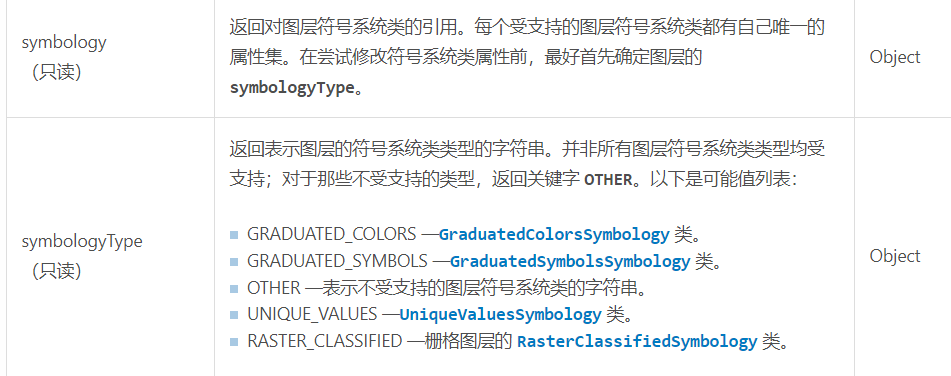

In [23]:
for i in field_add:
    for lyr in arcpy.mapping.ListLayers(mxd):
        
        if lyr.symbologyType == 'GRADUATED_COLORS':
            
        
        

XZQ_water
XZQ_town
XZQ_vill_277_data
XZQ_water
XZQ_town
XZQ_vill_277_data
XZQ_water
XZQ_town
XZQ_vill_277_data
XZQ_water
XZQ_town
XZQ_vill_277_data
XZQ_water
XZQ_town
XZQ_vill_277_data
XZQ_water
XZQ_town
XZQ_vill_277_data
XZQ_water
XZQ_town
XZQ_vill_277_data
XZQ_water
XZQ_town
XZQ_vill_277_data
XZQ_water
XZQ_town
XZQ_vill_277_data
XZQ_water
XZQ_town
XZQ_vill_277_data
XZQ_water
XZQ_town
XZQ_vill_277_data
XZQ_water
XZQ_town
XZQ_vill_277_data
